In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import math

In [2]:
# Define a dictionary for unique color and marker combinations with all regions
region_styles = {
    'Alta Floresta': ('blue', 'o'),
    'Barra do Garças': ('green', 's'),
    'Confresa - Vila Rica': ('red', 'd'),
    'Cuiabá': ('purple', '*'),
    'Cáceres': ('orange', 'x'),
    'Diamantino': ('brown', '^'),  
    'Jaciara': ('pink', 'v'),       
    'Juara': ('gray', '<'),         
    'Juína': ('olive', '>'),        
    'Mirassol D\'oeste': ('cyan', 's'),  
    'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*'),  
    'Pontes e Lacerda - Comodoro': ('yellow', 'd'),  
    'Primavera do Leste': ('teal', '^'),  
    'Rondonópolis': ('lime', 'v'),      
    'Sinop': ('darkviolet', '<'),      
    'Sorriso': ('salmon', '>'),         
    'Tangará da Serra': ('gold', '*'),  
    'Água Boa': ('tan', 's')           
}

In [3]:
def create_total_amount_plot(file_path, sheet_name="Planilha3", output_path=None, y_zero_line=False, show_plot=False):
    """
    Creates a plot of total amount linear fits by region
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Set global font size to 16
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16
    })
    
    # Create figure with white background
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Use the region_styles dictionary for consistent styling across plots
    region_styles = {
        'Alta Floresta': ('blue', 'o', '-'),
        'Barra do Garças': ('green', 's', '--'),
        'Confresa - Vila Rica': ('red', 'd', '-'),
        'Cuiabá': ('purple', '*', '--'),
        'Cáceres': ('orange', 'x', '-'),
        'Diamantino': ('brown', '^', '--'),  
        'Jaciara': ('pink', 'v', '-'),       
        'Juara': ('gray', '<', '--'),         
        'Juína': ('olive', '>', '-'),        
        'Mirassol D\'oeste': ('cyan', 's', '--'),  
        'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*', '-'),  
        'Pontes e Lacerda - Comodoro': ('yellow', 'd', '--'),  
        'Primavera do Leste': ('teal', '^', '-'),  
        'Rondonópolis': ('lime', 'v', '--'),      
        'Sinop': ('darkviolet', '<', '-'),      
        'Sorriso': ('salmon', '>', '--'),         
        'Tangará da Serra': ('gold', '*', '-'),  
        'Água Boa': ('tan', 's', '--')           
    }
    
    line_width = 2.5
    
    # Get all available regions in the dataframe
    available_regions = df['Regions'].unique()
    print(f"Available regions in data: {available_regions}")
    
    # Track regions that are successfully plotted
    plotted_regions = []
    
    # Plot fitted lines for each region
    for region in available_regions:
        if region not in region_styles:
            print(f"Warning: No style defined for {region}, skipping.")
            continue
            
        region_df = df[df['Regions'] == region]
        
        if not region_df.empty:
            # Get style information
            color, _, line_style = region_styles[region]
            
            # Use seaborn's regplot for linear regression
            sns.regplot(x='Year', y='Total ammount', data=region_df,
                        scatter=False, ci=None, ax=ax,
                        line_kws={
                            'color': color,
                            'linestyle': line_style,
                            'linewidth': line_width,
                            'alpha': 0.9
                        },
                        label=region)
            
            plotted_regions.append(region)
            print(f"Successfully plotted linear fit for {region}")
    
    # Print summary of plotted regions
    print(f"\nSuccessfully plotted {len(plotted_regions)} regions: {plotted_regions}")
    print(f"Regions not plotted: {set(available_regions) - set(plotted_regions)}")
    
    # Add axis labels
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Amount')
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    if y_zero_line:
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.7)
    
    # Format y-axis ticks to 45 degrees
    plt.yticks(rotation=45)
    
    # Legend settings
    legend = ax.legend(
        fontsize=16,
        ncol=6,
        bbox_to_anchor=(0.5, -0.15),
        loc='upper center',
        frameon=True,
        framealpha=0.8,
        edgecolor='black',
        borderpad=1.2
    )
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    # Save plot if path provided
    if output_path:
        fig.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white')
    
    plt.close(fig)
    return fig, ax

In [4]:
def create_exponential_fit_plot(file_path, sheet_name="Planilha3", output_path=None, y_zero_line=False, show_plot=False):
    """
    Creates a plot with exponential fits for total amount by region
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Set global font size to 16
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16
    })
    
    # Create figure with white background
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Filter out zero or negative values before log transformation
    df = df[df['Total ammount'] > 0].copy()
    df['log_Total_ammount'] = np.log(df['Total ammount'])
    
    # Use the region_styles dictionary for consistent styling across plots
    region_styles = {
        'Alta Floresta': ('blue', 'o', '-'),
        'Barra do Garças': ('green', 's', '--'),
        'Confresa - Vila Rica': ('red', 'd', '-'),
        'Cuiabá': ('purple', '*', '--'),
        'Cáceres': ('orange', 'x', '-'),
        'Diamantino': ('brown', '^', '--'),  
        'Jaciara': ('pink', 'v', '-'),       
        'Juara': ('gray', '<', '--'),         
        'Juína': ('olive', '>', '-'),        
        'Mirassol D\'oeste': ('cyan', 's', '--'),  
        'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*', '-'),  
        'Pontes e Lacerda - Comodoro': ('yellow', 'd', '--'),  
        'Primavera do Leste': ('teal', '^', '-'),  
        'Rondonópolis': ('lime', 'v', '--'),      
        'Sinop': ('darkviolet', '<', '-'),      
        'Sorriso': ('salmon', '>', '--'),         
        'Tangará da Serra': ('gold', '*', '-'),  
        'Água Boa': ('tan', 's', '--')           
    }
    
    line_width = 2.5
    
    # Get all available regions in the dataframe
    available_regions = df['Regions'].unique()
    print(f"Available regions in data: {available_regions}")
    
    # Track regions that are successfully plotted
    plotted_regions = []
    
    # For each region, perform exponential fit and plot
    for region in available_regions:
        if region not in region_styles:
            print(f"Warning: No style defined for {region}, skipping.")
            continue
            
        region_df = df[df['Regions'] == region]
        
        # Get style information
        color, _, line_style = region_styles[region]
        
        if len(region_df) >= 2:  # Need at least 2 points for a fit
            try:
                # Fit log-linear model (equivalent to exponential)
                coeffs = np.polyfit(region_df['Year'], region_df['log_Total_ammount'], 1)
                
                # Generate years for prediction
                years_min = region_df['Year'].min()
                years_max = region_df['Year'].max()
                # Extend the range by 2 years in both directions
                years_pred = np.linspace(years_min - 2, years_max + 2, 100)
                
                # Calculate predicted values (exponential)
                log_pred = coeffs[0] * years_pred + coeffs[1]
                pred = np.exp(log_pred)
                
                # Plot the fitted line
                plt.plot(years_pred, pred, 
                         color=color, 
                         linestyle=line_style, 
                         linewidth=line_width,
                         label=region)
                
                plotted_regions.append(region)
                print(f"Successfully fitted exponential curve for {region}")
            except Exception as e:
                print(f"Could not fit exponential curve for {region}: {e}")
                
                # Try to plot raw data points as fallback
                if len(region_df) >= 1:
                    plt.scatter(region_df['Year'], region_df['Total ammount'], 
                               color=color, 
                               s=50,
                               label=f"{region} (points)")
                    plotted_regions.append(region)
        else:
            print(f"Insufficient data for {region} - need at least 2 points for exponential fit")
    
    # Print summary of plotted regions
    print(f"\nSuccessfully plotted {len(plotted_regions)} regions: {plotted_regions}")
    print(f"Regions not plotted: {set(available_regions) - set(plotted_regions)}")
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add axis labels
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Amount')
    
    if y_zero_line:
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.7)
    
    # Format y-axis ticks to 45 degrees
    plt.yticks(rotation=45)
    
    # Legend settings
    legend = ax.legend(
        fontsize=16,
        ncol=6,
        bbox_to_anchor=(0.5, -0.15),
        loc='upper center',
        frameon=True,
        framealpha=0.8,
        edgecolor='black',
        borderpad=1.2
    )
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    # Save plot if path provided
    if output_path:
        fig.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white')
    
    plt.close(fig)
    return fig, ax

In [5]:
def create_logistic_fit_plot(file_path, sheet_name="Planilha3", output_path=None, y_zero_line=False, show_plot=False):
    """
    Creates a plot with logistic fits for total amount by region.
    
    The logistic function models growth that approaches a carrying capacity:
    f(x) = capacity / (1 + np.exp(-growth_rate * (x - x0)))
    
    Parameters:
    -----------
    file_path : str
        Path to the Excel file containing the data
    sheet_name : str, default="Planilha3"
        Name of the sheet in the Excel file
    output_path : str, optional
        Path to save the plot
    y_zero_line : bool, default=False
        Whether to display a horizontal line at y=0
    show_plot : bool, default=False
        Whether to display the plot
        
    Returns:
    --------
    fig, ax : matplotlib Figure and Axes objects
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
    
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Set global font size to 16
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16
    })
    
    # Create figure with white background
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Filter out zero or negative values
    df = df[df['Total ammount'] > 0].copy()
    
    # Define logistic function for curve fitting
    def logistic_function(x, capacity, growth_rate, x0):
        """
        Logistic function with parameters:
        capacity: the carrying capacity (upper asymptote)
        growth_rate: the growth rate
        x0: the midpoint of the curve (inflection point)
        """
        return capacity / (1 + np.exp(-growth_rate * (x - x0)))
    
    # Use the region_styles dictionary for consistent styling across plots
    region_styles = {
        'Alta Floresta': ('blue', 'o', '-'),
        'Barra do Garças': ('green', 's', '--'),
        'Confresa - Vila Rica': ('red', 'd', '-'),
        'Cuiabá': ('purple', '*', '--'),
        'Cáceres': ('orange', 'x', '-'),
        'Diamantino': ('brown', '^', '--'),  
        'Jaciara': ('pink', 'v', '-'),       
        'Juara': ('gray', '<', '--'),         
        'Juína': ('olive', '>', '-'),        
        'Mirassol D\'oeste': ('cyan', 's', '--'),  
        'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*', '-'),  
        'Pontes e Lacerda - Comodoro': ('yellow', 'd', '--'),  
        'Primavera do Leste': ('teal', '^', '-'),  
        'Rondonópolis': ('lime', 'v', '--'),      
        'Sinop': ('darkviolet', '<', '-'),      
        'Sorriso': ('salmon', '>', '--'),         
        'Tangará da Serra': ('gold', '*', '-'),  
        'Água Boa': ('tan', 's', '--')           
    }
    
    line_width = 2.5
    
    # Get all available regions in the dataframe
    available_regions = df['Regions'].unique()
    print(f"Available regions in data: {available_regions}")
    
    # Track regions that are successfully plotted
    plotted_regions = []
    
    # For each region, perform logistic fit and plot
    for region in available_regions:
        if region not in region_styles:
            print(f"Warning: No style defined for {region}, skipping.")
            continue
            
        region_df = df[df['Regions'] == region]
        
        # Extract x and y data
        years = np.array(region_df['Year'])
        amounts = np.array(region_df['Total ammount'])
        
        if len(region_df) < 2:  # Need at least 2 data points
            print(f"Insufficient data for {region}, skipping.")
            continue
            
        # Get style information
        color, _, line_style = region_styles[region]
            
        # Generate years for prediction (extend beyond data range)
        min_year = min(years) if len(years) > 0 else df['Year'].min()
        max_year = max(years) if len(years) > 0 else df['Year'].max()
        years_pred = np.linspace(min_year - 2, max_year + 2, 100)
        
        # Try logistic fit first (for 3+ points)
        if len(region_df) >= 3:
            try:
                # Initial parameter guesses for logistic fit
                # capacity: maximum value in data * 1.5
                # growth_rate: 0.5 (moderate growth)
                # x0: middle year in the dataset
                p0 = [max(amounts) * 1.5, 0.5, np.median(years)]
                
                # Set bounds for parameters (lower, upper)
                # capacity: between max value and 10x max value
                # growth_rate: between 0.01 and 5
                # x0: between min year and max year
                bounds = (
                    [max(amounts), 0.01, min(years)],
                    [max(amounts) * 10, 5, max(years)]
                )
                
                # Fit logistic function to data
                popt, _ = curve_fit(
                    logistic_function, 
                    years, 
                    amounts, 
                    p0=p0,
                    bounds=bounds,
                    maxfev=10000,  # Increase max function evaluations
                    method='trf'   # Use trust region reflective algorithm
                )
                
                # Calculate predicted values using fitted parameters
                pred = logistic_function(years_pred, *popt)
                
                # Plot the fitted line
                plt.plot(years_pred, pred, 
                         color=color, 
                         linestyle=line_style, 
                         linewidth=line_width,
                         label=f"{region}")
                
                # Log success
                print(f"Successfully fitted logistic curve for {region}")
                plotted_regions.append(region)
                # Uncomment to print fitted parameters
                # print(f"{region} - Capacity: {popt[0]:.2f}, Growth rate: {popt[1]:.4f}, Midpoint: {popt[2]:.2f}")
                
                # Continue to next region since we've successfully plotted this one
                continue
                
            except Exception as e:
                print(f"Could not fit logistic curve for {region}, trying exponential fit: {e}")
                # Fall through to exponential fit if logistic fails
        
        # Try exponential fit as backup (will work with 2+ points)
        try:
            print(f"Using exponential fit for {region} as fallback")
            # Filter valid data points (positive values) for log transformation
            valid_indices = amounts > 0
            if sum(valid_indices) >= 2:
                valid_years = years[valid_indices]
                valid_amounts = amounts[valid_indices]
                
                # Fit exponential model (linear in log space)
                log_amounts = np.log(valid_amounts)
                coeffs = np.polyfit(valid_years, log_amounts, 1)
                
                # Calculate predicted values (exponential)
                log_pred = coeffs[0] * years_pred + coeffs[1]
                pred = np.exp(log_pred)
                
                # Plot the fitted line with dashed pattern to indicate it's a fallback
                plt.plot(years_pred, pred, 
                         color=color, 
                         linestyle=line_style, 
                         linewidth=line_width,
                         label=f"{region} (exp)")
                print(f"Successfully used exponential fit for {region}")
                plotted_regions.append(region)
            else:
                print(f"Insufficient positive data points for {region}, connecting points directly")
                # If we have at least 2 points, just connect them directly
                if len(years) >= 2:
                    plt.plot(years, amounts, 
                             color=color, 
                             linestyle=line_style, 
                             linewidth=line_width,
                             label=f"{region} (raw)")
                    plotted_regions.append(region)
        except Exception as e:
            print(f"Failed to plot {region} with any method: {e}")
            # If all else fails, just plot the raw points
            if len(years) > 0:
                plt.scatter(years, amounts, 
                           color=color, 
                           s=50,
                           label=f"{region} (points)")
                plotted_regions.append(region)
    
    # Print summary of plotted regions
    print(f"\nSuccessfully plotted {len(plotted_regions)} regions: {plotted_regions}")
    print(f"Regions not plotted: {set(available_regions) - set(plotted_regions)}")
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add axis labels
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Amount')
    
    if y_zero_line:
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.7)
    
    # Format y-axis ticks to 45 degrees
    plt.yticks(rotation=45)
    
    # Legend settings
    legend = ax.legend(
        fontsize=16,
        ncol=6,
        bbox_to_anchor=(0.5, -0.15),
        loc='upper center',
        frameon=True,
        framealpha=0.8,
        edgecolor='black',
        borderpad=1.2
    )
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    # Save plot if path provided
    if output_path:
        fig.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white')
    
    plt.close(fig)
    return fig, ax


=== Generating Linear Fit Plot ===
Available regions in data: ['Água Boa' 'Alta Floresta' 'Barra do Garças' 'Cáceres'
 'Confresa - Vila Rica' 'Cuiabá' 'Diamantino' 'Jaciara' 'Juara' 'Juína'
 "Mirassol D'oeste" 'Peixoto de Azevedo - Guarantã do Norte'
 'Pontes e Lacerda - Comodoro' 'Primavera do Leste' 'Rondonópolis' 'Sinop'
 'Sorriso' 'Tangará da Serra']
Successfully plotted linear fit for Água Boa
Successfully plotted linear fit for Alta Floresta
Successfully plotted linear fit for Barra do Garças
Successfully plotted linear fit for Cáceres
Successfully plotted linear fit for Confresa - Vila Rica
Successfully plotted linear fit for Cuiabá
Successfully plotted linear fit for Diamantino
Successfully plotted linear fit for Jaciara
Successfully plotted linear fit for Juara
Successfully plotted linear fit for Juína
Successfully plotted linear fit for Mirassol D'oeste
Successfully plotted linear fit for Peixoto de Azevedo - Guarantã do Norte
Successfully plotted linear fit for Pontes e Lac

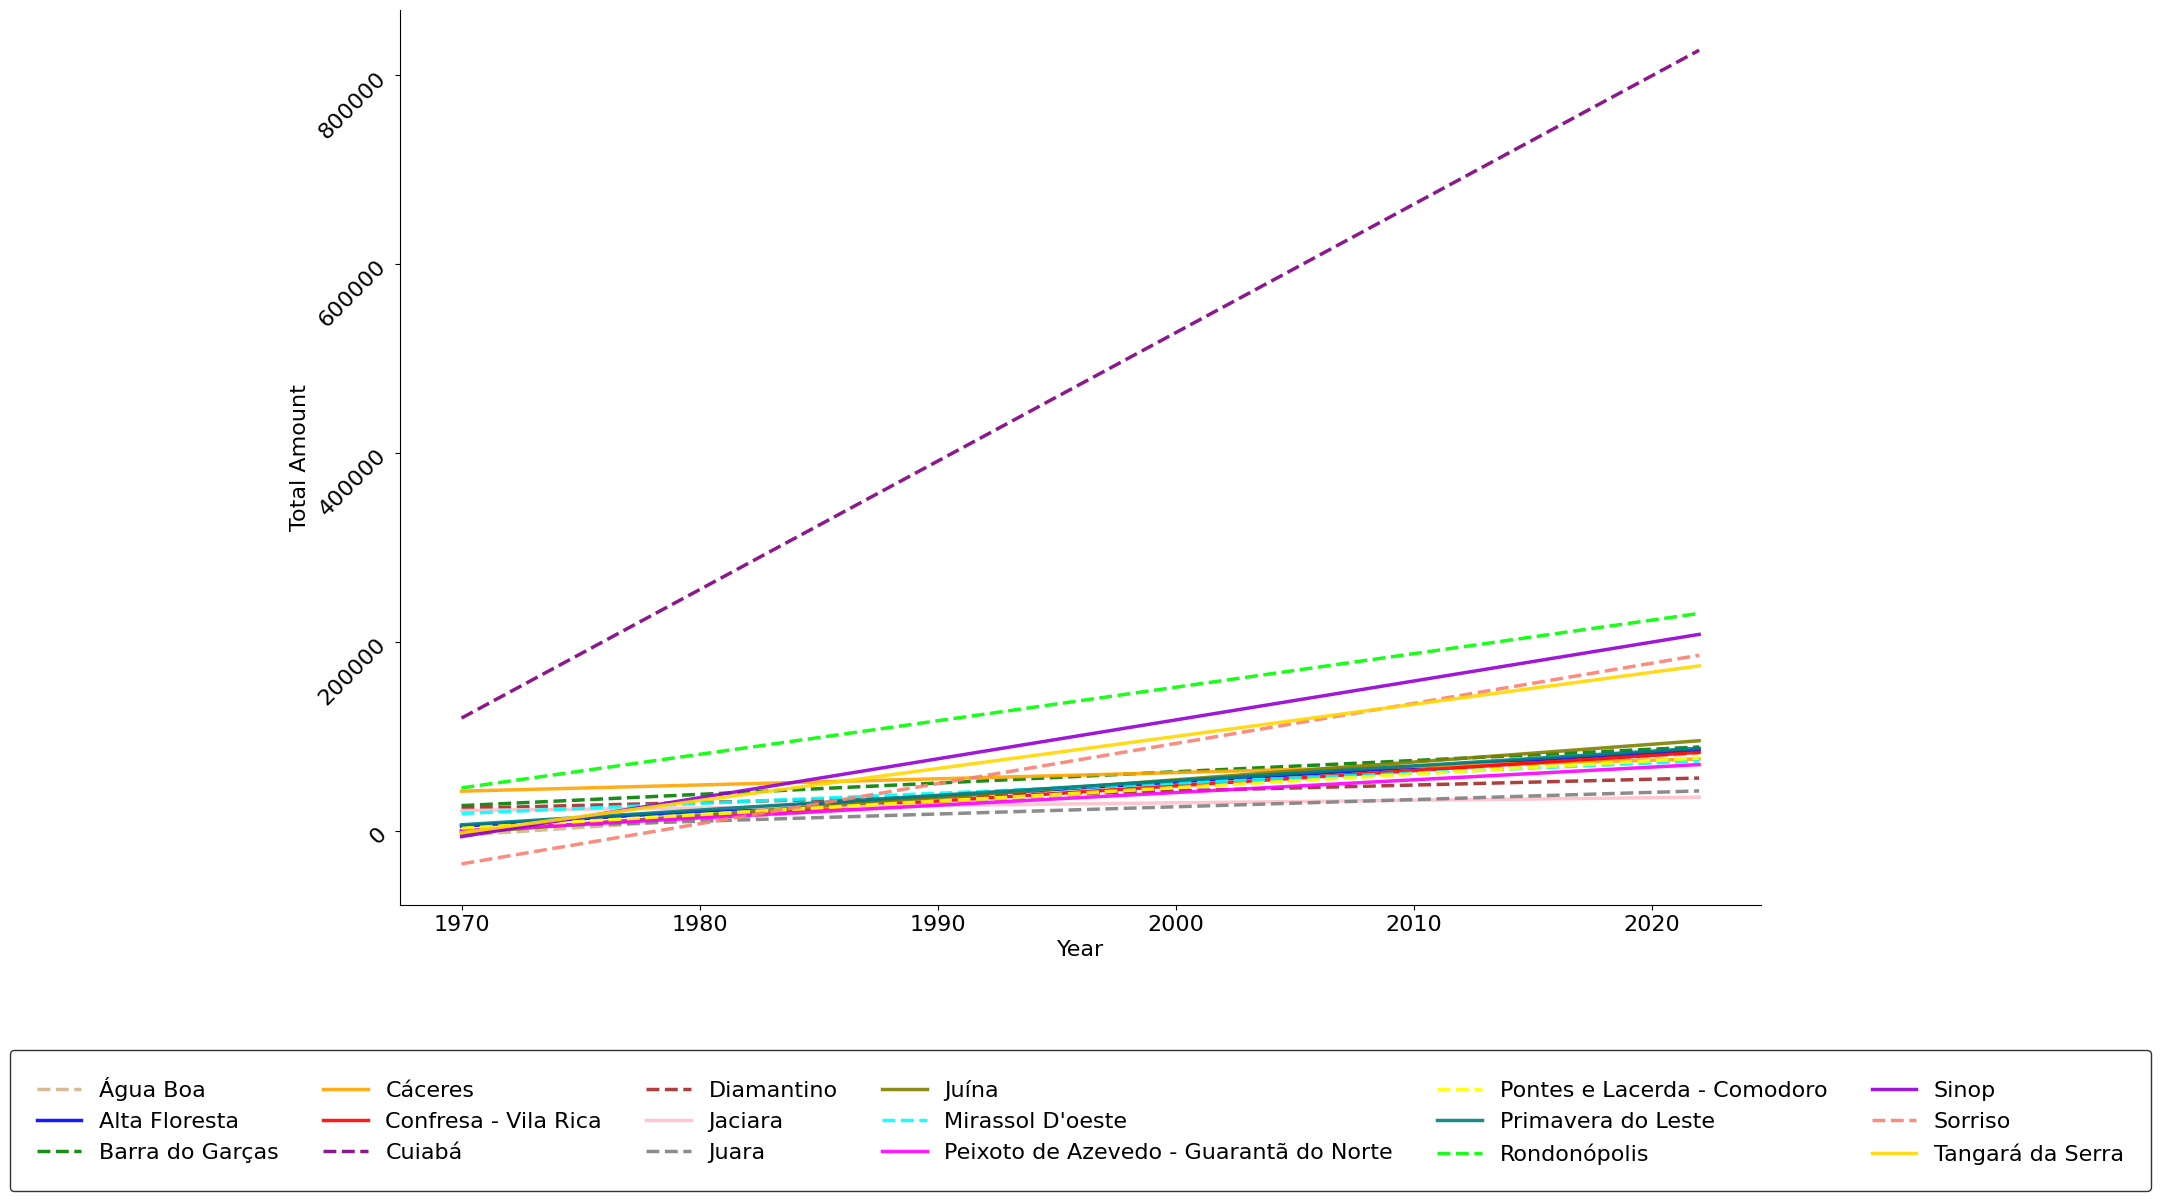


=== Generating Exponential Fit Plot ===
Available regions in data: ['Barra do Garças' 'Cáceres' 'Confresa - Vila Rica' 'Cuiabá' 'Diamantino'
 'Jaciara' 'Juara' 'Juína' 'Pontes e Lacerda - Comodoro'
 'Primavera do Leste' 'Rondonópolis' 'Tangará da Serra' 'Água Boa'
 'Alta Floresta' "Mirassol D'oeste" 'Sinop'
 'Peixoto de Azevedo - Guarantã do Norte' 'Sorriso']
Successfully fitted exponential curve for Barra do Garças
Successfully fitted exponential curve for Cáceres
Successfully fitted exponential curve for Confresa - Vila Rica
Successfully fitted exponential curve for Cuiabá
Successfully fitted exponential curve for Diamantino
Successfully fitted exponential curve for Jaciara
Successfully fitted exponential curve for Juara
Successfully fitted exponential curve for Juína
Successfully fitted exponential curve for Pontes e Lacerda - Comodoro
Successfully fitted exponential curve for Primavera do Leste
Successfully fitted exponential curve for Rondonópolis
Successfully fitted exponential 

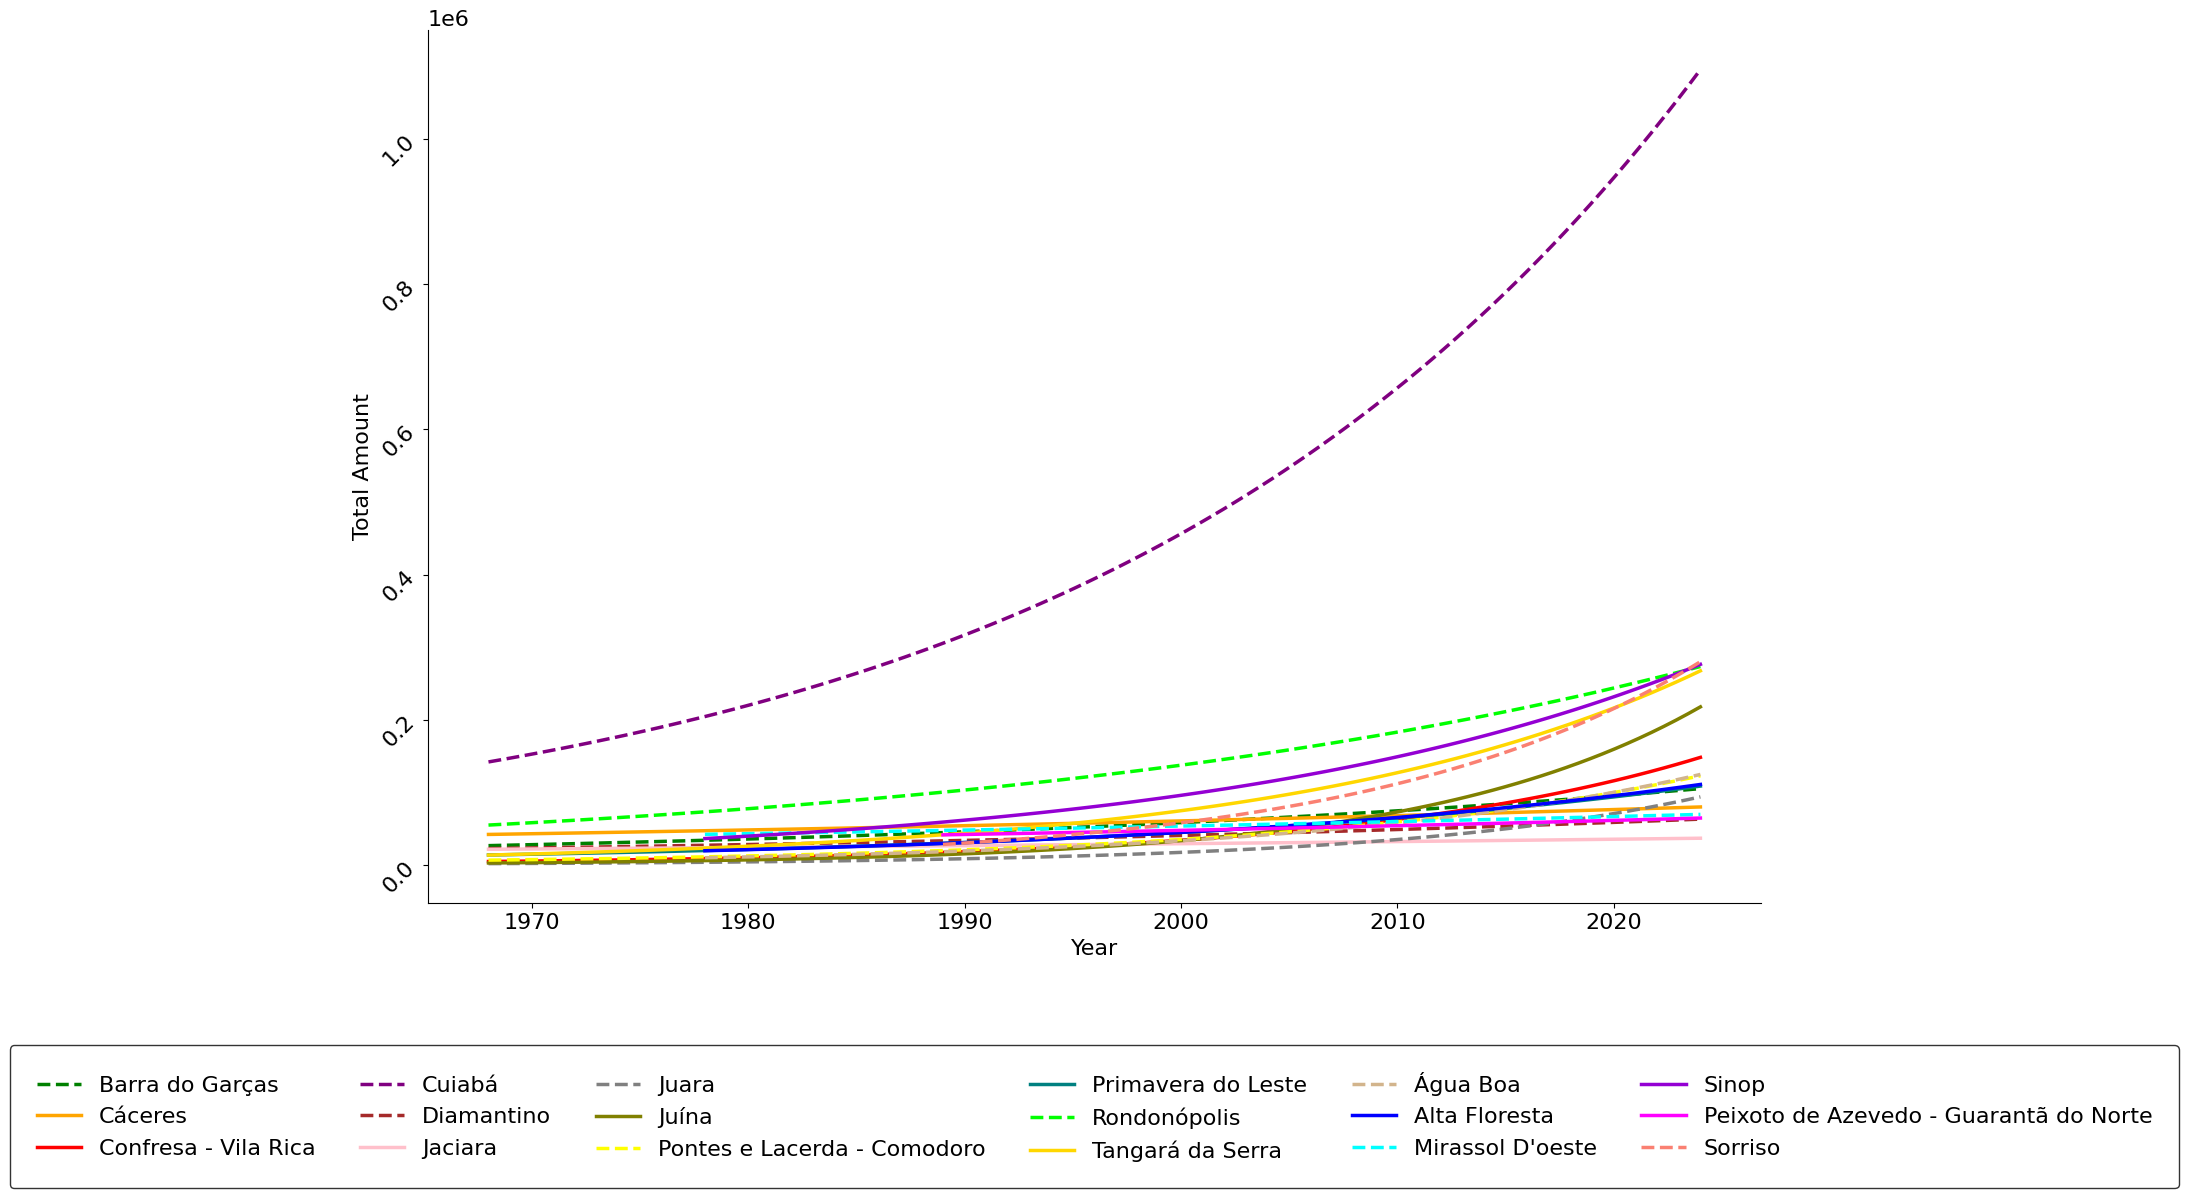


=== Generating Logistic Fit Plot ===
Available regions in data: ['Barra do Garças' 'Cáceres' 'Confresa - Vila Rica' 'Cuiabá' 'Diamantino'
 'Jaciara' 'Juara' 'Juína' 'Pontes e Lacerda - Comodoro'
 'Primavera do Leste' 'Rondonópolis' 'Tangará da Serra' 'Água Boa'
 'Alta Floresta' "Mirassol D'oeste" 'Sinop'
 'Peixoto de Azevedo - Guarantã do Norte' 'Sorriso']
Successfully fitted logistic curve for Barra do Garças
Successfully fitted logistic curve for Cáceres
Successfully fitted logistic curve for Confresa - Vila Rica
Successfully fitted logistic curve for Cuiabá
Successfully fitted logistic curve for Diamantino
Successfully fitted logistic curve for Jaciara
Successfully fitted logistic curve for Juara
Successfully fitted logistic curve for Juína
Successfully fitted logistic curve for Pontes e Lacerda - Comodoro
Successfully fitted logistic curve for Primavera do Leste
Successfully fitted logistic curve for Rondonópolis
Successfully fitted logistic curve for Tangará da Serra
Successfully

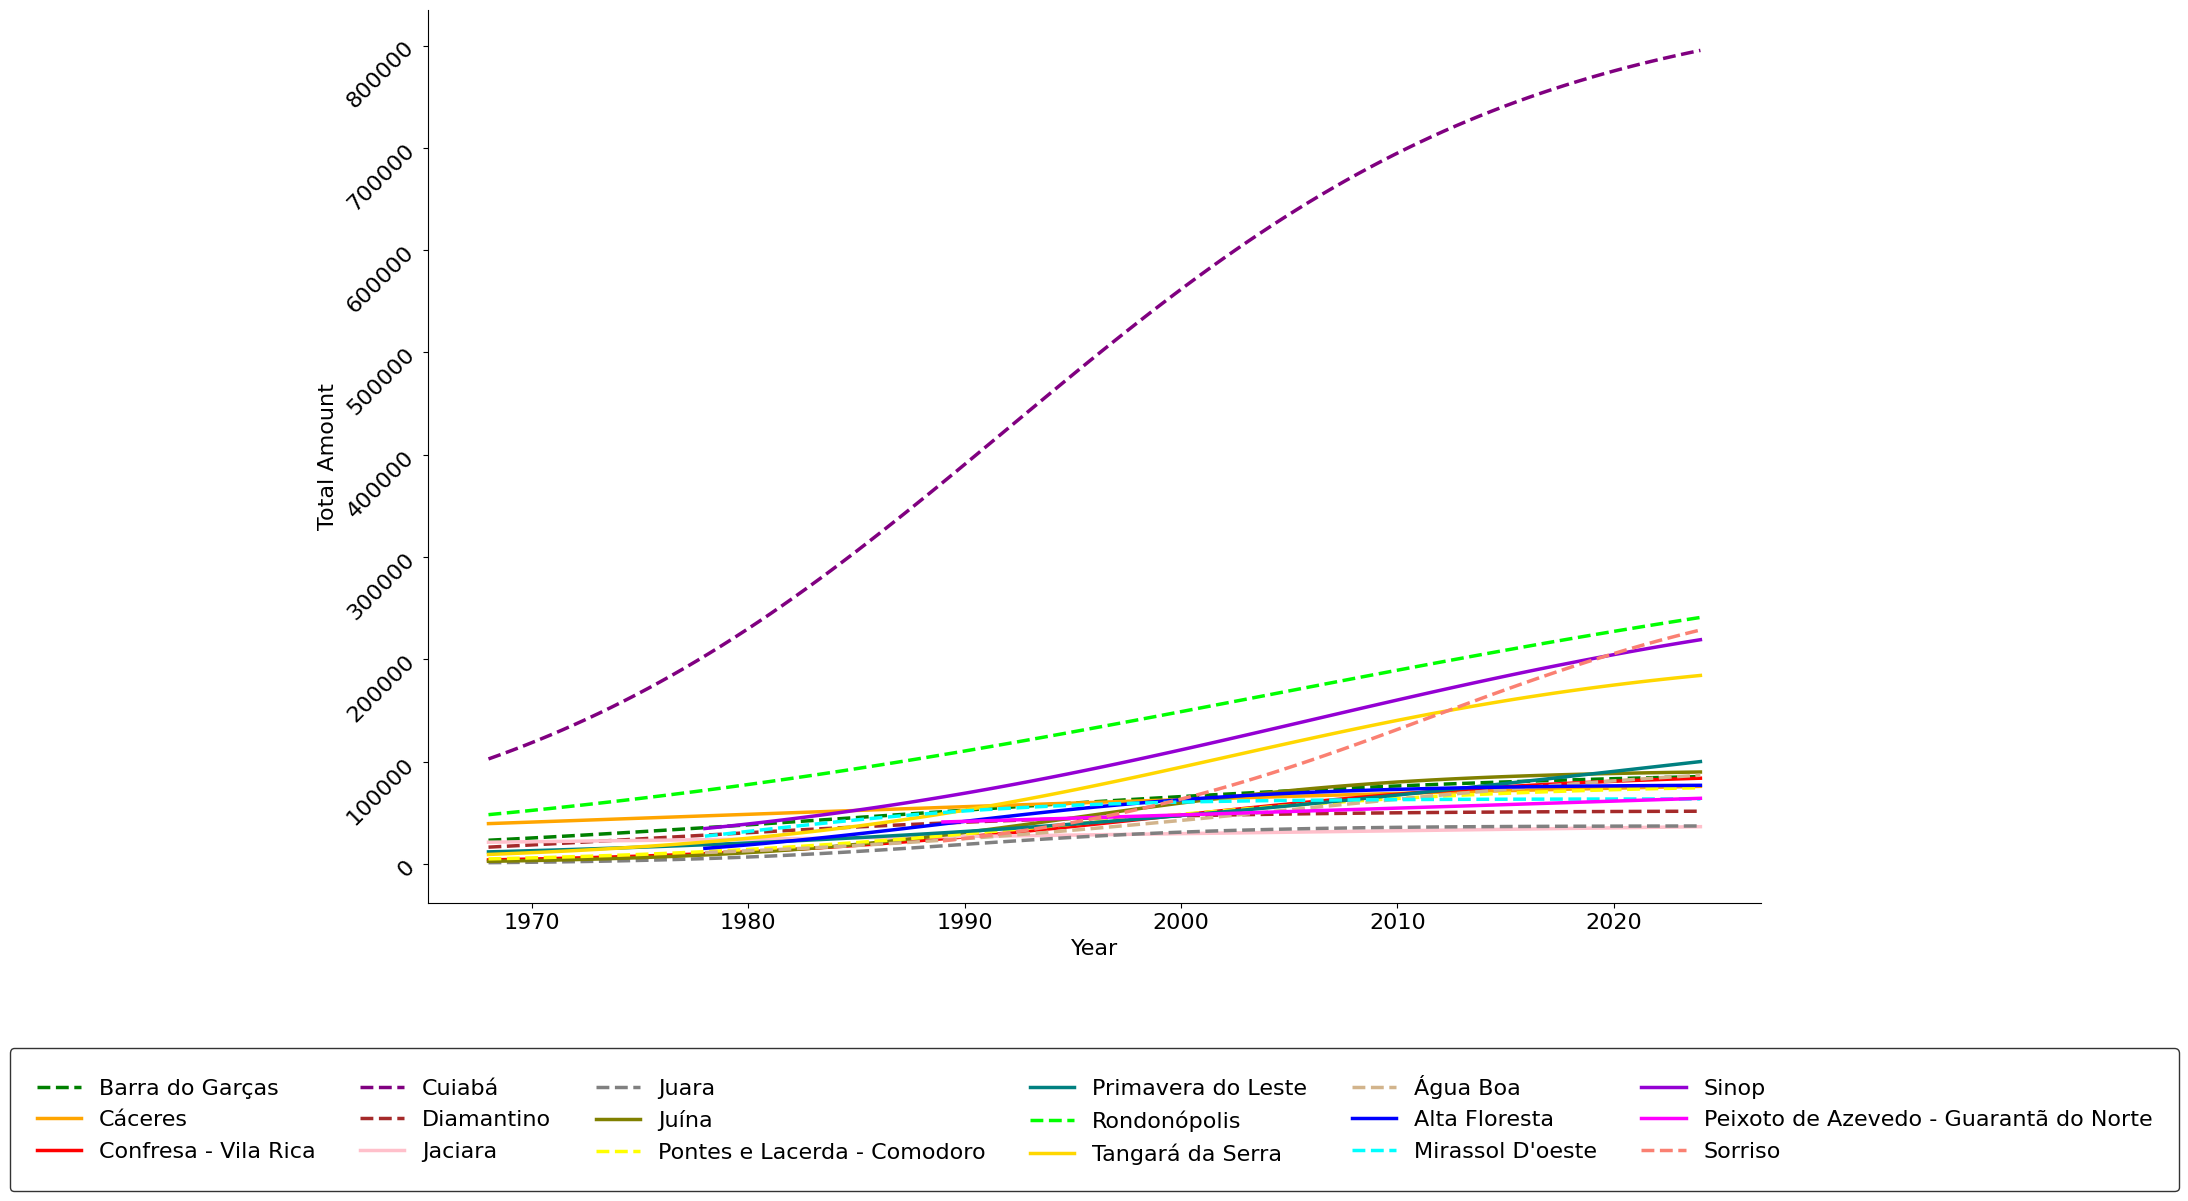


All plots generated successfully!


In [6]:
def main():
    """
    Main function to generate all plots
    """
    import os
    
    # Define paths
    file_path = "Table 14.xlsx"  # Update with your file path
    output_dir = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos"
    
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created output directory: {output_dir}")
    
    # Generate plots
    print("\n=== Generating Linear Fit Plot ===")
    create_total_amount_plot(
        file_path=file_path,
        sheet_name="Planilha3",
        output_path=os.path.join(output_dir, "Graph6_Linear.jpg"),
        show_plot=True
    )
    
    print("\n=== Generating Exponential Fit Plot ===")
    create_exponential_fit_plot(
        file_path=file_path,
        sheet_name="Planilha3",
        output_path=os.path.join(output_dir, "Graph7_Exponential.jpg"),
        show_plot=True
    )

    print("\n=== Generating Logistic Fit Plot ===")
    create_logistic_fit_plot(
        file_path=file_path,
        sheet_name="Planilha3",
        output_path=os.path.join(output_dir, "Graph8_Logistic.jpg"),
        show_plot=True
    )
    
    print("\nAll plots generated successfully!")

if __name__ == "__main__":
    main()

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\WAP.jpg


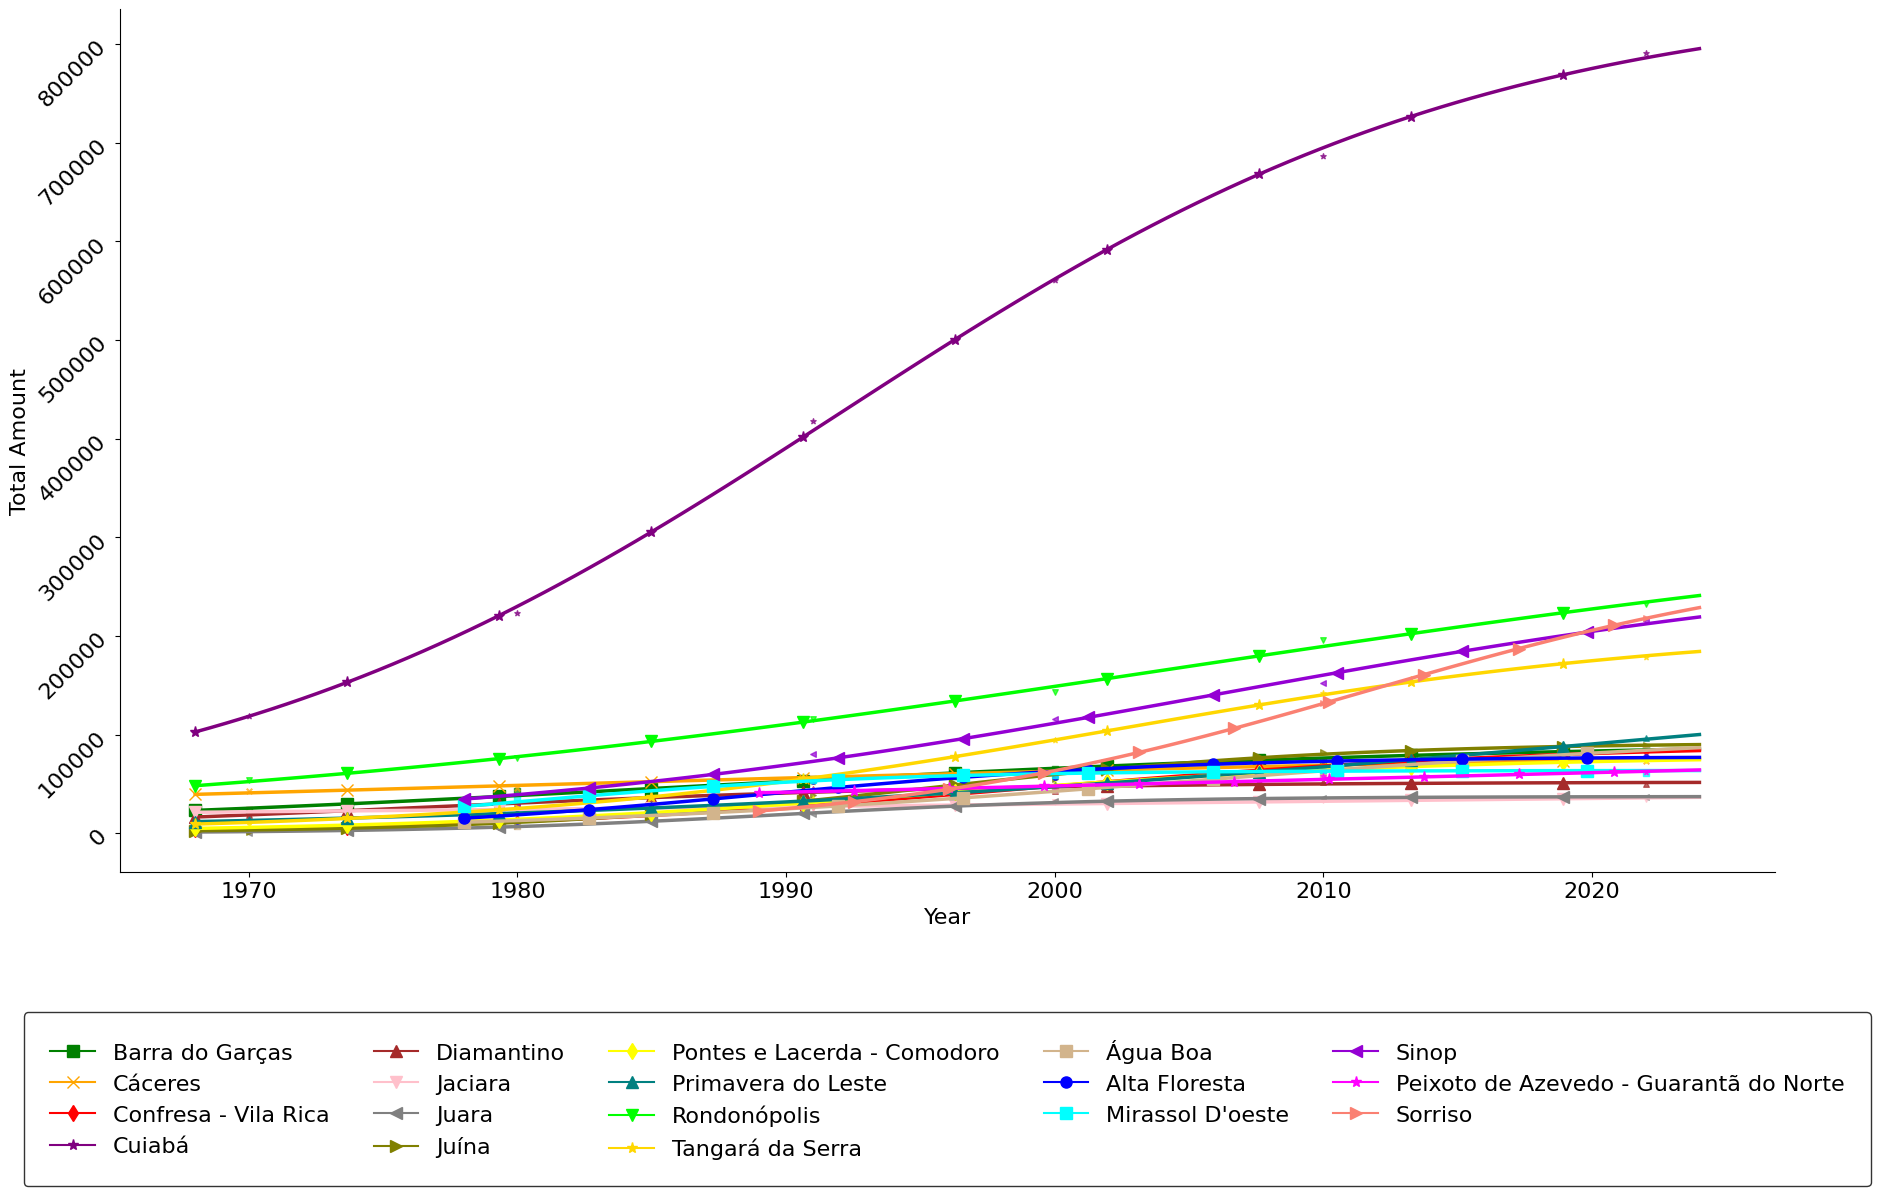

(<Figure size 2000x1600 with 1 Axes>,
 <Axes: xlabel='Year', ylabel='Total Amount'>)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def create_logistic_fit_plot_with_markers(file_path, sheet_name="Planilha3", output_path=None, y_zero_line=False, show_plot=False):
    """
    Creates and saves a plot with logistic fits for total amount by region including Cuiabá.
    Legend uses the same styles as the plot lines.
    """
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Set global font size to 16
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16
    })
    
    # Create figure with white background
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Filter out zero or negative values
    df = df[df['Total ammount'] > 0].copy()
    
    # Define logistic function
    def logistic_function(x, capacity, growth_rate, x0):
        return capacity / (1 + np.exp(-growth_rate * (x - x0)))
    
    # Region styles with color and marker (including Cuiabá)
    region_styles = {
        'Alta Floresta': ('blue', 'o'),
        'Barra do Garças': ('green', 's'),
        'Confresa - Vila Rica': ('red', 'd'),
        'Cuiabá': ('purple', '*'),  
        'Cáceres': ('orange', 'x'),
        'Diamantino': ('brown', '^'),  
        'Jaciara': ('pink', 'v'),       
        'Juara': ('gray', '<'),         
        'Juína': ('olive', '>'),        
        'Mirassol D\'oeste': ('cyan', 's'),  
        'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*'),  
        'Pontes e Lacerda - Comodoro': ('yellow', 'd'),  
        'Primavera do Leste': ('teal', '^'),  
        'Rondonópolis': ('lime', 'v'),      
        'Sinop': ('darkviolet', '<'),      
        'Sorriso': ('salmon', '>'),         
        'Tangará da Serra': ('gold', '*'),  
        'Água Boa': ('tan', 's')           
    }
    
    line_width = 2.5
    marker_size = 8
    marker_frequency = 10
    
    # Get available regions
    available_regions = df['Regions'].unique()
    plotted_regions = []
    
    # Create legend handles manually
    legend_handles = []
    
    # Plot each region
    for region in available_regions:
        if region not in region_styles:
            continue
            
        region_df = df[df['Regions'] == region]
        years = np.array(region_df['Year'])
        amounts = np.array(region_df['Total ammount'])
        
        if len(region_df) < 2:
            continue
            
        color, marker = region_styles[region]
        years_pred = np.linspace(min(years) - 2, max(years) + 2, 100)
        
        # Create a legend entry for this region
        legend_entry = plt.Line2D([], [], color=color, marker=marker, linestyle='-',
                                 markersize=marker_size, label=region)
        legend_handles.append(legend_entry)
        
        # Try logistic fit
        if len(region_df) >= 3:
            try:
                p0 = [max(amounts) * 1.5, 0.5, np.median(years)]
                bounds = ([max(amounts), 0.01, min(years)], [max(amounts) * 10, 5, max(years)])
                popt, _ = curve_fit(logistic_function, years, amounts, p0=p0, bounds=bounds, maxfev=10000)
                pred = logistic_function(years_pred, *popt)
                
                # Plot fitted line and markers
                plt.plot(years_pred, pred, color=color, linestyle='-', linewidth=line_width)
                for i in range(0, len(years_pred), marker_frequency):
                    plt.plot(years_pred[i], pred[i], color=color, marker=marker, markersize=marker_size)
                plt.scatter(years, amounts, color=color, marker=marker, s=marker_size*2, alpha=0.7)
                plotted_regions.append(region)
                continue
            except:
                pass
                
        # Fallback to exponential fit
        try:
            valid_indices = amounts > 0
            if sum(valid_indices) >= 2:
                valid_years = years[valid_indices]
                valid_amounts = amounts[valid_indices]
                coeffs = np.polyfit(valid_years, np.log(valid_amounts), 1)
                pred = np.exp(coeffs[0] * years_pred + coeffs[1])
                
                plt.plot(years_pred, pred, color=color, linestyle='-', linewidth=line_width)
                for i in range(0, len(years_pred), marker_frequency):
                    plt.plot(years_pred[i], pred[i], color=color, marker=marker, markersize=marker_size)
                plt.scatter(years, amounts, color=color, marker=marker, s=marker_size*2, alpha=0.7)
                plotted_regions.append(region)
        except:
            pass
    
    # Format the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Amount')
    plt.yticks(rotation=45)
    
    # Create legend using our custom handles
    legend = ax.legend(
        handles=legend_handles,
        fontsize=16,
        ncol=5,
        bbox_to_anchor=(0.5, -0.15),
        loc='upper center',
        frameon=True,
        framealpha=0.8,
        edgecolor='black',
        borderpad=1.2
    )
    
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Save the plot
    if output_path:
        fig.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white')
        print(f"Plot saved to: {output_path}")
    
    if show_plot:
        plt.show()
    
    plt.close(fig)
    return fig, ax

# Run the function with your specified path
output_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\WAP.jpg"
create_logistic_fit_plot_with_markers(
    file_path="Table 14.xlsx",
    output_path=output_path,
    show_plot=True
)

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\WAP-excluding Cuiabá.jpg


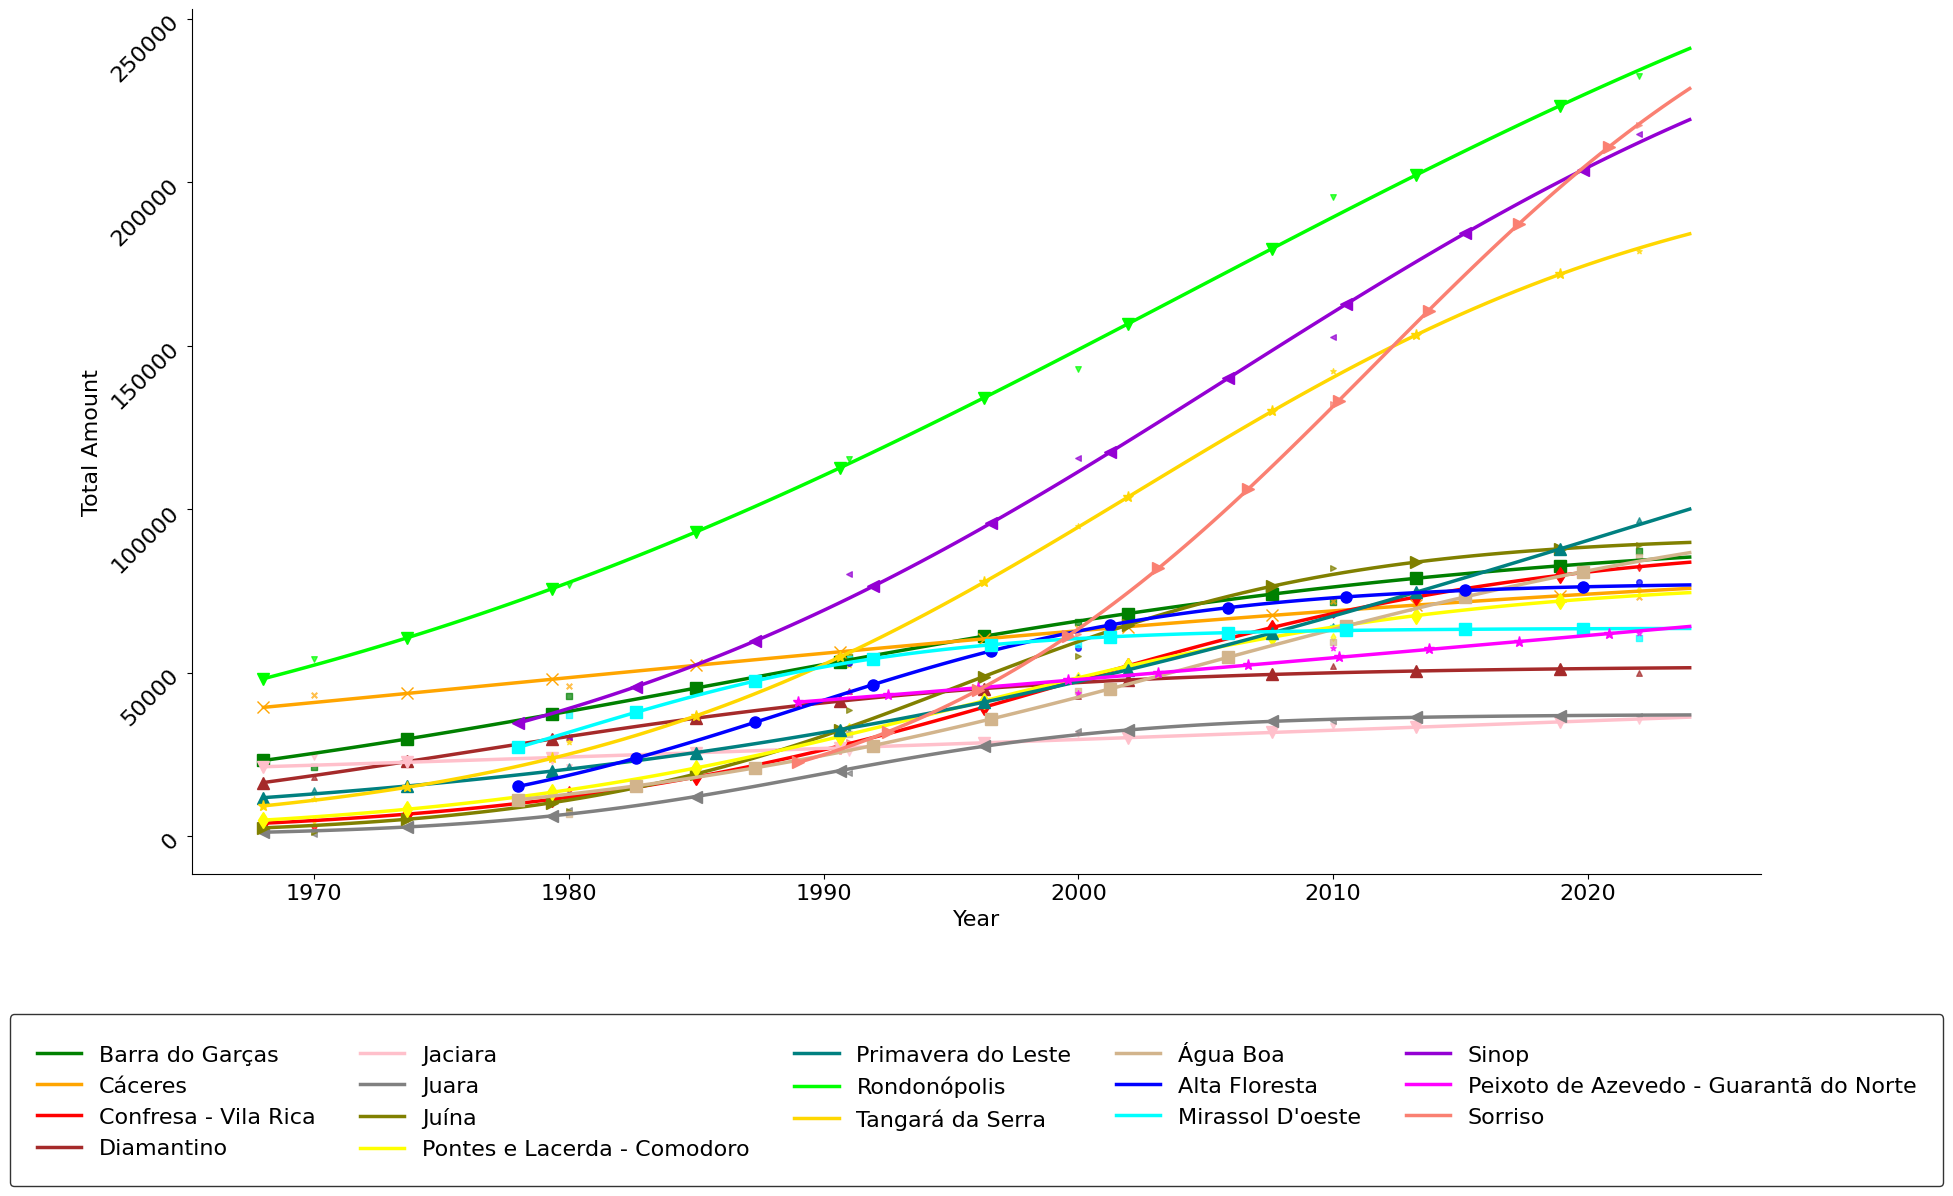

(<Figure size 2000x1600 with 1 Axes>,
 <Axes: xlabel='Year', ylabel='Total Amount'>)

In [8]:
def create_logistic_fit_plot_with_markers(file_path, sheet_name="Planilha3", output_path=None, y_zero_line=False, show_plot=False):
    """
    Creates and saves a plot with logistic fits for total amount by region without Cuiabá.
    """
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Set global font size to 16
    plt.rcParams.update({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'legend.fontsize': 16
    })
    
    # Create figure with white background
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # Filter out zero or negative values
    df = df[df['Total ammount'] > 0].copy()
    
    # Remove Cuiabá from the dataset
    df = df[df['Regions'] != 'Cuiabá'].copy()
    
    # Define logistic function
    def logistic_function(x, capacity, growth_rate, x0):
        return capacity / (1 + np.exp(-growth_rate * (x - x0)))
    
    # Region styles with color and marker only
    region_styles = {
        'Alta Floresta': ('blue', 'o'),
        'Barra do Garças': ('green', 's'),
        'Confresa - Vila Rica': ('red', 'd'),
        'Cáceres': ('orange', 'x'),
        'Diamantino': ('brown', '^'),  
        'Jaciara': ('pink', 'v'),       
        'Juara': ('gray', '<'),         
        'Juína': ('olive', '>'),        
        'Mirassol D\'oeste': ('cyan', 's'),  
        'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*'),  
        'Pontes e Lacerda - Comodoro': ('yellow', 'd'),  
        'Primavera do Leste': ('teal', '^'),  
        'Rondonópolis': ('lime', 'v'),      
        'Sinop': ('darkviolet', '<'),      
        'Sorriso': ('salmon', '>'),         
        'Tangará da Serra': ('gold', '*'),  
        'Água Boa': ('tan', 's')           
    }
    
    line_width = 2.5
    marker_size = 8
    marker_frequency = 10
    
    # Get available regions
    available_regions = df['Regions'].unique()
    plotted_regions = []
    
    # Plot each region
    for region in available_regions:
        if region not in region_styles:
            continue
            
        region_df = df[df['Regions'] == region]
        years = np.array(region_df['Year'])
        amounts = np.array(region_df['Total ammount'])
        
        if len(region_df) < 2:
            continue
            
        color, marker = region_styles[region]
        years_pred = np.linspace(min(years) - 2, max(years) + 2, 100)
        
        # Try logistic fit
        if len(region_df) >= 3:
            try:
                p0 = [max(amounts) * 1.5, 0.5, np.median(years)]
                bounds = ([max(amounts), 0.01, min(years)], [max(amounts) * 10, 5, max(years)])
                popt, _ = curve_fit(logistic_function, years, amounts, p0=p0, bounds=bounds, maxfev=10000)
                pred = logistic_function(years_pred, *popt)
                
                # Plot fitted line and markers
                plt.plot(years_pred, pred, color=color, linestyle='-', linewidth=line_width, label=region)
                for i in range(0, len(years_pred), marker_frequency):
                    plt.plot(years_pred[i], pred[i], color=color, marker=marker, markersize=marker_size)
                plt.scatter(years, amounts, color=color, marker=marker, s=marker_size*2, alpha=0.7)
                plotted_regions.append(region)
                continue
            except:
                pass
                
        # Fallback to exponential fit
        try:
            valid_indices = amounts > 0
            if sum(valid_indices) >= 2:
                valid_years = years[valid_indices]
                valid_amounts = amounts[valid_indices]
                coeffs = np.polyfit(valid_years, np.log(valid_amounts), 1)
                pred = np.exp(coeffs[0] * years_pred + coeffs[1])
                
                plt.plot(years_pred, pred, color=color, linestyle='-', linewidth=line_width, label=f"{region} (exp)")
                for i in range(0, len(years_pred), marker_frequency):
                    plt.plot(years_pred[i], pred[i], color=color, marker=marker, markersize=marker_size)
                plt.scatter(years, amounts, color=color, marker=marker, s=marker_size*2, alpha=0.7)
                plotted_regions.append(region)
        except:
            pass
    
    # Format the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Amount')
    plt.yticks(rotation=45)
    
    # Create legend
    legend = ax.legend(
        fontsize=16,
        ncol=5,
        bbox_to_anchor=(0.5, -0.15),
        loc='upper center',
        frameon=True,
        framealpha=0.8,
        edgecolor='black',
        borderpad=1.2
    )
    
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])
    
    # Save the plot
    if output_path:
        fig.savefig(output_path, dpi=1200, bbox_inches='tight', facecolor='white')
        print(f"Plot saved to: {output_path}")
    
    if show_plot:
        plt.show()
    
    plt.close(fig)
    return fig, ax

# Run the function with your specified path
output_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\WAP-excluding Cuiabá.jpg"
create_logistic_fit_plot_with_markers(
    file_path="Table 14.xlsx",
    output_path=output_path,
    show_plot=True
)

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.optimize import curve_fit
import plotly.graph_objects as go

def create_interactive_logistic_fit_plot_with_selector(file_path, sheet_name="Planilha3", output_path=None, y_zero_line=False, show_plot=False):
    """
    Creates and saves an interactive plot with logistic fits for total amount by region including Cuiabá, with a specific title and region selector, showing all regions on opening and legend at the bottom.
    Legend uses the same styles as the plot lines.
    """
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet_name)

    # Filter out zero or negative values
    df = df[df['Total ammount'] > 0].copy()

    # Define logistic function
    def logistic_function(x, capacity, growth_rate, x0):
        return capacity / (1 + np.exp(-growth_rate * (x - x0)))

    # Region styles with color
    region_styles = {
        'Alta Floresta': 'blue',
        'Barra do Garças': 'green',
        'Confresa - Vila Rica': 'red',
        'Cuiabá': 'purple',
        'Cáceres': 'orange',
        'Diamantino': 'brown',
        'Jaciara': 'pink',
        'Juara': 'gray',
        'Juína': 'olive',
        'Mirassol D\'oeste': 'cyan',
        'Peixoto de Azevedo - Guarantã do Norte': 'magenta',
        'Pontes e Lacerda - Comodoro': 'yellow',
        'Primavera do Leste': 'teal',
        'Rondonópolis': 'lime',
        'Sinop': 'darkviolet',
        'Sorriso': 'salmon',
        'Tangará da Serra': 'gold',
        'Água Boa': 'tan'
    }

    line_width = 2.5

    # Get available regions
    available_regions = sorted(df['Regions'].unique())
    fig = go.Figure()

    # Add traces for each region
    for region in available_regions:
        region_df = df[df['Regions'] == region]
        years = np.array(region_df['Year'])
        amounts = np.array(region_df['Total ammount'])

        if len(region_df) < 2:
            continue

        color = region_styles[region]
        years_pred = np.linspace(min(years) - 2, max(years) + 2, 100)

        # Try logistic fit
        if len(region_df) >= 3:
            try:
                p0 = [max(amounts) * 1.5, 0.5, np.median(years)]
                bounds = ([max(amounts), 0.01, min(years)], [max(amounts) * 10, 5, max(years)])
                popt, _ = curve_fit(logistic_function, years, amounts, p0=p0, bounds=bounds, maxfev=10000)
                pred = logistic_function(years_pred, *popt)

                fig.add_trace(go.Scatter(x=years_pred, y=pred, mode='lines',
                                         line=dict(color=color, width=line_width),
                                         name=region, visible=True)) # Initially show traces
                fig.add_trace(go.Scatter(x=years, y=amounts, mode='markers',
                                         marker=dict(color=color),
                                         name=region, showlegend=False, visible=True)) # Initially show traces
                continue
            except:
                pass

        # Fallback to exponential fit
        try:
            valid_indices = amounts > 0
            if sum(valid_indices) >= 2:
                valid_years = years[valid_indices]
                valid_amounts = amounts[valid_indices]
                coeffs = np.polyfit(valid_years, np.log(valid_amounts), 1)
                pred = np.exp(coeffs[0] * years_pred + coeffs[1])

                fig.add_trace(go.Scatter(x=years_pred, y=pred, mode='lines',
                                         line=dict(color=color, width=line_width),
                                         name=region, visible=True)) # Initially show traces
                fig.add_trace(go.Scatter(x=years, y=amounts, mode='markers',
                                         marker=dict(color=color),
                                         name=region, showlegend=False, visible=True)) # Initially show traces
        except:
            pass

    # Add 'All' option
    all_traces = list(range(2 * len(available_regions)))
    buttons = [dict(label='All',
                    method='update',
                    args=[{'visible': [True] * len(all_traces)},
                          {'title': 'WAP logarithimical fitted lines',
                           'showlegend': True}])]

    # Add buttons for each region
    for i, region in enumerate(available_regions):
        trace_indices = [2 * i, 2 * i + 1]
        visibility = [False] * len(all_traces)
        for index in trace_indices:
            visibility[index] = True
        buttons.append(dict(label=region,
                            method='update',
                            args=[{'visible': visibility},
                                  {'title': f'WAP logarithimical fitted lines - {region}',
                                   'showlegend': True}]))

    # Format the plot
    fig.update_layout(
        title='WAP logarithimical fitted lines',
        xaxis_title='Year',
        yaxis_title='Total Amount',
        font=dict(size=16),
        legend=dict(
            font=dict(size=16),
            orientation="h",
            yanchor="top",
            y=-0.1,
            xanchor="center",
            x=0.5
        ),
        margin=dict(b=150),
        plot_bgcolor='white',
        updatemenus=[dict(
            active=0,
            buttons=buttons,
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.15,
            yanchor='top'
        )]
    )
    fig.update_yaxes(tickangle=45)

    # Save the plot
    if output_path:
        fig.write_html(output_path)
        print(f"Interactive plot with selector saved to: {output_path}")

    if show_plot:
        fig.show()

    return fig

# Run the function with your specified path
output_path_interactive_fits = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\WAP_interactive_fits.html"
create_interactive_logistic_fit_plot_with_selector(
    file_path="Table 14.xlsx",
    output_path=output_path_interactive_fits,
    show_plot=True
)

Interactive plot with selector saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\WAP_interactive_fits.html
